# Neural Networks and Automatic Differentiation

revision: 78571a2

In [43]:
# @formatter:off
# PREAMBLE

import autograd.numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from autograd import grad
from autograd.misc.optimizers import adam
from numpy import testing
from sklearn import preprocessing

from mlis.arrays import asinput, aslabel

%matplotlib inline
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
%load_ext autoreload
%autoreload 2
# @formatter:on

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<AxesSubplot:xlabel='temp', ylabel='energy'>

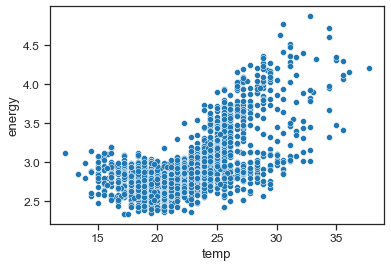

In [44]:
# load data
df = pd.read_csv('energy.csv', sep=' ')
X = asinput(df['temp'])
y = aslabel(df['energy'])
t = np.linspace(X.min(), X.max())

# plot data
fig, ax = plt.subplots()
sns.scatterplot(ax=ax, x='temp', y='energy', data=df)

Implement a vectorized version of the ReLU activation function $z \mapsto \max \{0, z\}$.

In [45]:
# Open activation.py and implement the function ReLu

from mlis.neuralnetwoks.activation import ReLu

z = np.array([-.1, 0, 1.23, -1])
testing.assert_array_almost_equal(ReLu(z), [0, 0, 1.23, 0], decimal=2)

In [46]:
def init(layer_sizes, scale, rng=np.random.RandomState(0)):
    """Build a list of randomly initialized (U, c) tuples, one for each layer."""
    params = []
    for insize, outsize in zip(layer_sizes[:-1], layer_sizes[1:]):
        U = rng.randn(insize, outsize) * scale
        c = rng.randn(outsize) * scale
        params.append((U, c))
    return params


params = init(layer_sizes=[1, 4, 1], scale=0.5)

for i, (U, c) in enumerate(params):
    print(f'U_{i}: {U}, c_{i}: {c}')

U_0: [[0.88202617 0.2000786  0.48936899 1.1204466 ]], c_0: [ 0.933779   -0.48863894  0.47504421 -0.0756786 ]
U_1: [[-0.05160943]
 [ 0.20529925]
 [ 0.07202179]
 [ 0.72713675]], c_1: [0.38051886]


Implement the $k$-layer hypothesis function

\begin{align*}
z_1 &= x\\
z_{i+1} &= \sigma(U_i z_i + c_i), \quad i=1, \dotsc, k-1\\
h(x) &= U_k z_k + c_k
\end{align*}

where $\sigma$ is the activation function and the list `params` contains the tuples $(U_i, c_i)$ i.e. `[ (U_1, c_1), ..., (U_k, c_k) ]`.

In [47]:
# Open feedforward.py and implement the function predict
from mlis.neuralnetwoks.feedforward import predict

# test the correctness of the implementation
X = np.array([1, 2, 3])
params = init(layer_sizes=[1, 4, 1], scale=0.5, rng=np.random.RandomState(0))

for i, (U, c) in enumerate(params):
    print(f'U_{i}: {U}, c_{i}: {c}')

actual = predict(X, params)
expected = np.array([[1.12], [1.92], [2.75]])
testing.assert_array_almost_equal(actual, expected, decimal=2)

U_0: [[0.88202617 0.2000786  0.48936899 1.1204466 ]], c_0: [ 0.933779   -0.48863894  0.47504421 -0.0756786 ]
U_1: [[-0.05160943]
 [ 0.20529925]
 [ 0.07202179]
 [ 0.72713675]], c_1: [0.38051886]


In [48]:
# fit scaler
scaler = preprocessing.StandardScaler().fit(asinput(df['temp']))
# load data
X = scaler.transform(asinput(df['temp']))
y = aslabel(df['energy'])

# Here is our initial guess:
params = init(scale=0.5, layer_sizes=[1, 4, 1], rng=np.random.RandomState(0))


# Objective function
def J(params, _):
    pred = predict(X, params)
    err = aslabel(y).reshape((-1, 1)) - pred
    return np.mean(err ** 2)


# print information during optimization
def callback(params, step, g):
    if step % 250 == 0:
        print(f"J(w): {J(params, step):1.5e}")

In [49]:
# good values are:
# num_iters = 200
# epochs = 20
# step_size in [0.1, 0.05]

step size: 0.1
	epoch: 0	J(w): 5.28083e+00
	epoch: 1	J(w): 7.35453e-02
	epoch: 2	J(w): 7.31592e-02
	epoch: 3	J(w): 7.31525e-02
	epoch: 4	J(w): 7.31489e-02
	epoch: 5	J(w): 7.31629e-02
	epoch: 6	J(w): 7.31101e-02
	epoch: 7	J(w): 7.34362e-02
	epoch: 8	J(w): 7.34077e-02
	epoch: 9	J(w): 7.33275e-02
step size: 0.05
	epoch: 0	J(w): 7.35612e-02
	epoch: 1	J(w): 7.34972e-02
	epoch: 2	J(w): 7.32852e-02
	epoch: 3	J(w): 7.32184e-02
	epoch: 4	J(w): 7.31732e-02
	epoch: 5	J(w): 7.31832e-02
	epoch: 6	J(w): 7.31933e-02
	epoch: 7	J(w): 7.32043e-02
	epoch: 8	J(w): 7.32137e-02
	epoch: 9	J(w): 7.31951e-02
step size: 0.025
	epoch: 0	J(w): 7.31642e-02
	epoch: 1	J(w): 7.31561e-02
	epoch: 2	J(w): 7.31530e-02
	epoch: 3	J(w): 7.31537e-02
	epoch: 4	J(w): 7.31541e-02
	epoch: 5	J(w): 7.31549e-02
	epoch: 6	J(w): 7.31553e-02
	epoch: 7	J(w): 7.31560e-02
	epoch: 8	J(w): 7.31563e-02
	epoch: 9	J(w): 7.31570e-02
U_0: [[-0.19072673 -0.29525681  0.07035103  0.83159663]], c_0: [ 0.68855974 -1.30107442 -0.91888744  0.35674212]

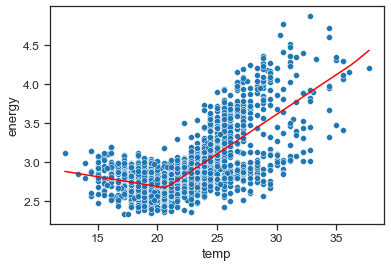

In [50]:
# try different numbers iterations, epochs and step_sizes until the network learned a good approximation
num_iters = 100
epochs = 10

for step_size in [0.1, 0.05, 0.025]:
    print(f'step size: {step_size}')
    for epoch in range(epochs):
        print(f'\tepoch: {epoch}', end='\t')
        params = adam(grad(J), params, step_size=step_size, num_iters=num_iters, callback=callback)
        
        if J(params, None) < 2e-5:
            break

for i, (U, c) in enumerate(params):
    print(f'U_{i}: {U}, c_{i}: {c}')

t = np.linspace(df['temp'].min(), df['temp'].max())

# plot data
fig, ax = plt.subplots()
sns.scatterplot(ax=ax, x='temp', y='energy', data=df)
ax.plot(t, predict(scaler.transform(asinput(t)), params), 'r')

step size: 0.1
	epoch: 0	J(w): 7.31574e-02
	epoch: 1	J(w): 7.32069e-02
	epoch: 2	J(w): 7.31671e-02
	epoch: 3	J(w): 7.31568e-02
	epoch: 4	J(w): 7.31498e-02
	epoch: 5	J(w): 7.31456e-02
	epoch: 6	J(w): 7.31686e-02
	epoch: 7	J(w): 7.31569e-02
	epoch: 8	J(w): 7.31452e-02
	epoch: 9	J(w): 7.31752e-02
	epoch: 10	J(w): 7.31569e-02
	epoch: 11	J(w): 7.31454e-02
	epoch: 12	J(w): 7.31738e-02
	epoch: 13	J(w): 7.31577e-02
	epoch: 14	J(w): 7.31455e-02
	epoch: 15	J(w): 7.31447e-02
	epoch: 16	J(w): 7.31620e-02
	epoch: 17	J(w): 7.31525e-02
	epoch: 18	J(w): 7.31461e-02
	epoch: 19	J(w): 7.31528e-02
step size: 0.05
	epoch: 0	J(w): 7.31467e-02
	epoch: 1	J(w): 7.31506e-02
	epoch: 2	J(w): 7.31448e-02
	epoch: 3	J(w): 7.31463e-02
	epoch: 4	J(w): 7.31447e-02
	epoch: 5	J(w): 7.31452e-02
	epoch: 6	J(w): 7.31448e-02
	epoch: 7	J(w): 7.31464e-02
	epoch: 8	J(w): 7.31447e-02
	epoch: 9	J(w): 7.31448e-02
	epoch: 10	J(w): 7.31463e-02
	epoch: 11	J(w): 7.31452e-02
	epoch: 12	J(w): 7.31483e-02
	epoch: 13	J(w): 7.31447e-02
	ep

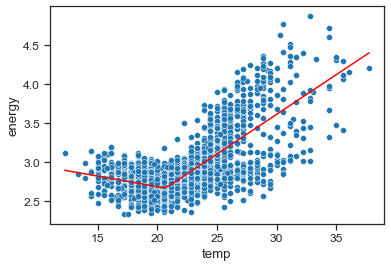

In [51]:
# Same as previous cell?
# try different numbers iterations, epochs and step_sizes until the network learned a good approximation
num_iters = 200
epochs = 20

for step_size in [0.1, 0.05]:
    print(f'step size: {step_size}')
    for epoch in range(epochs):
        print(f'\tepoch: {epoch}', end='\t')
        params = adam(grad(J), params, step_size=step_size, num_iters=num_iters, callback=callback)
        
        if J(params, None) < 2e-5:
            break

for i, (U, c) in enumerate(params):
    print(f'U_{i}: {U}, c_{i}: {c}')

t = np.linspace(df['temp'].min(), df['temp'].max())

# plot data
fig, ax = plt.subplots()
sns.scatterplot(ax=ax, x='temp', y='energy', data=df)
ax.plot(t, predict(scaler.transform(asinput(t)), params), 'r')